In [87]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/refraction-index/train (1).csv
/kaggle/input/refraction-index/test.csv


### **importing libraries**

In [88]:
import numpy as np 
import pandas as pd 
import seaborn as sns 
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt
%matplotlib inline

In [89]:

from sklearn.model_selection import StratifiedKFold
import matplotlib.patches as patches
import matplotlib.pylab as plt
from scipy import interp
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import roc_curve,auc

In [90]:
df1=pd.read_csv('/kaggle/input/refraction-index/train (1).csv')
df2=pd.read_csv('/kaggle/input/refraction-index/test.csv')


In [91]:
df1.describe()

,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Hydrogen,Helium,Lithium,...,Acetate,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density
count,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000,659.0,659.000000,...,659.0,659.0,659.0,659.0,659.000000,659.000000,659.000000,659.000000,659.000000,659.000000
mean,2.579666,3.233794,1.572079,2.582712,2.710167,1.246416,0.001956,1.481032,0.0,0.036419,...,0.0,0.0,0.0,0.0,0.003035,0.793627,16.975721,496.827981,0.100307,4.869285
std,1.539040,2.285671,1.093867,1.866618,1.659294,0.789210,0.014495,3.732815,0.0,0.231047,...,0.0,0.0,0.0,0.0,0.055048,2.380880,15.780100,520.265891,0.099153,2.763471
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,2.000000,41.312340,0.011040,0.485000
25%,2.000000,1.670000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,7.000000,184.144773,0.044483,2.818000
50%,2.000000,3.250000,2.000000,2.850000,4.000000,1.591000,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,13.000000,331.915978,0.078001,4.358000
75%,3.000000,5.250000,2.000000,3.690000,4.000000,1.713000,0.000000,1.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,0.000000,0.000000,21.000000,606.029994,0.123329,6.321500
max,6.000000,9.000000,3.000000,8.928000,4.000000,3.383000,0.213000,33.000000,0.0,3.000000,...,0.0,0.0,0.0,0.0,1.000000,22.000000,168.000000,4079.341200,1.209774,13.893000


In [92]:
df3=pd.concat([df1,df2])

In [93]:
df3.head(10)

,Name,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Refractive Index,Dispersion,Hydrogen,Helium,...,Acetate,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density
0,Biehlite,2,0.00,0,0.000,0,0.000,0.000,0,0,...,0,0,0,0,0,0,6,340.619790,0.033629,8.407
1,Periclase,0,6.00,2,3.607,2,1.740,0.000,0,0,...,0,0,0,0,0,0,3,96.151400,0.011217,7.115
2,Tschermigite,0,1.50,2,1.645,2,1.458,0.000,6,0,...,0,0,0,0,0,0,15,175.098319,0.145659,0.998
3,Vanadinite,5,3.50,1,6.950,3,2.383,0.202,0,0,...,0,0,0,0,0,0,7,548.792400,0.044663,10.199
4,Calderite,6,7.00,2,3.756,2,1.872,0.000,0,0,...,0,0,0,0,0,0,4,154.869950,0.011223,11.454
5,Akimotoite,5,0.00,3,3.810,0,0.000,0.000,0,0,...,0,0,0,0,0,0,3,68.389900,0.011222,5.058
6,Stercorite,1,2.00,3,0.000,0,0.000,0.000,0,0,...,0,0,0,0,1,4,11,191.029730,0.033719,4.702
7,Arthurite,2,3.50,0,0.000,4,0.000,0.000,0,0,...,0,0,0,0,0,2,10,311.350190,0.044865,5.760
8,Sarkinite,2,4.50,3,0.000,4,1.803,0.000,0,0,...,0,0,0,0,0,0,32,1063.213160,0.179319,4.921
9,Humite,3,6.25,3,3.260,4,1.639,0.000,0,0,...,0,0,0,0,0,0,19,524.781203,0.089701,4.856


In [94]:
df3.columns

Index(['Name', 'Crystal Structure', 'Mohs Hardness', 'Diaphaneity',
       'Specific Gravity', 'Optical', 'Refractive Index', 'Dispersion',
       'Hydrogen', 'Helium',
       ...
       'Acetate', 'Phosphate', 'Sulphate', 'Carbonate', 'Ammonium',
       'Hydrated Water', 'count', 'Molar Mass', 'Molar Volume',
       'Calculated Density'],
      dtype='object', length=139)

In [95]:
df3.dtypes

Name                   object
Crystal Structure       int64
Mohs Hardness         float64
Diaphaneity             int64
Specific Gravity      float64
                       ...   
Hydrated Water          int64
count                   int64
Molar Mass            float64
Molar Volume          float64
Calculated Density    float64
Length: 139, dtype: object

### **data cleaning**

In [96]:
features_with_all_zeroes = []

for feature in df1.columns:
    if len(df3[feature].unique()) == 1 and df3[feature].unique()[0] == 0:
        features_with_all_zeroes.append(feature)
print(features_with_all_zeroes)

['Helium', 'Neon', 'Argon', 'Gallium', 'Bromine', 'Krypton', 'Technetium', 'Ruthenium', 'Rhodium', 'Palladium', 'Indium', 'Xenon', 'Promethium', 'Samarium', 'Europium', 'Gadolinium', 'Dysprosium', 'Holmium', 'Erbium', 'Thulium', 'Ytterbium', 'Lutetium', 'Rhenium', 'Osmium', 'Iridium', 'Platinum', 'Gold', 'Mercury', 'Thallium', 'Polonium', 'Astatine', 'Radon', 'Francium', 'Radium', 'Actinium', 'Protactinium', 'Neptunium', 'Plutonium', 'Americium', 'Curium', 'Berkelium', 'Californium', 'Einsteinium', 'Fermium', 'Mendelevium', 'Nobelium', 'Lawrencium', 'Rutherfordium', 'Dubnium', 'Seaborgium', 'Bohrium', 'Hassium', 'Meitnerium', 'Darmstadtium', 'Roentgenium', 'Copernicium', 'Nihonium', 'Flerovium', 'Moscovium', 'Livermorium', 'Tennessine', 'Oganesson', 'Cyanide', 'Nitrate', 'Acetate', 'Phosphate', 'Sulphate', 'Carbonate']


In [97]:
df3=df3.drop('Name',axis=1)


In [98]:
X=df3.drop('Refractive Index',axis=1)
y=df3['Refractive Index']

In [99]:
df1.isnull().sum().sum()

0

In [100]:
selected_features = np.asarray(X.columns)
selected_features = selected_features[2:]
for feature_with_all_zeroes in features_with_all_zeroes:
    selected_features = np.delete(selected_features, np.argwhere(selected_features==feature_with_all_zeroes), None)
    
selected_features = np.delete(selected_features, np.argwhere(selected_features=='Refractive Index'), None)

In [101]:
# search and remove feature each other correlated

df_corr = X.corr()

correlated_features = set()

for row_feature in df_corr.index:
    if 'Unnamed' in row_feature or 'Density' in row_feature:
        continue
    for col_feature in df_corr.columns:
        if 'Unnamed' in col_feature or 'Density' in col_feature:
            continue
        if col_feature == row_feature:
            continue
        if df_corr[row_feature][col_feature] > 0.85:
            correlated_features.add(row_feature)
print(correlated_features)

for correlated_feature in correlated_features:
    selected_features = np.delete(selected_features, np.argwhere(selected_features==correlated_feature), None)

{'Neodymium', 'Lanthanum', 'count', 'Praseodymium', 'Molar Volume', 'Oxygen'}


In [102]:
X=X.drop(['Praseodymium', 'Oxygen', 'Molar Volume', 'count', 'Lanthanum', 'Neodymium','Helium', 'Neon', 'Argon', 'Gallium', 'Bromine', 'Krypton', 'Technetium', 'Ruthenium', 'Rhodium', 'Palladium', 'Indium', 'Xenon', 'Promethium', 'Samarium', 'Europium', 'Gadolinium', 'Dysprosium', 'Holmium', 'Erbium', 'Thulium', 'Ytterbium', 'Lutetium', 'Rhenium', 'Osmium', 'Iridium', 'Platinum', 'Gold', 'Mercury', 'Thallium', 'Polonium', 'Astatine', 'Radon', 'Francium', 'Radium', 'Actinium', 'Protactinium', 'Neptunium', 'Plutonium', 'Americium', 'Curium', 'Berkelium', 'Californium', 'Einsteinium', 'Fermium', 'Mendelevium', 'Nobelium', 'Lawrencium', 'Rutherfordium', 'Dubnium', 'Seaborgium', 'Bohrium', 'Hassium', 'Meitnerium', 'Darmstadtium', 'Roentgenium', 'Copernicium', 'Nihonium', 'Flerovium', 'Moscovium', 'Livermorium', 'Tennessine', 'Oganesson', 'Cyanide', 'Nitrate', 'Acetate', 'Phosphate', 'Sulphate', 'Carbonate'],axis=1)

In [103]:
X.columns

Index(['Crystal Structure', 'Mohs Hardness', 'Diaphaneity', 'Specific Gravity',
       'Optical', 'Dispersion', 'Hydrogen', 'Lithium', 'Beryllium', 'Boron',
       'Carbon', 'Nitrogen', 'Fluorine', 'Sodium', 'Magnesium', 'Aluminium',
       'Silicon', 'Phosphorus', 'Sulfur', 'Chlorine', 'Potassium', 'Calcium',
       'Scandium', 'Titanium', 'Vanadium', 'Chromium', 'Manganese', 'Iron',
       'Cobalt', 'Nickel', 'Copper', 'Zinc', 'Germanium', 'Arsenic',
       'Selenium', 'Rubidium', 'Strontium', 'Yttrium', 'Zirconium', 'Niobium',
       'Molybdenum', 'Silver', 'Cadmium', 'Tin', 'Antimony', 'Tellurium',
       'Iodine', 'Cesium', 'Barium', 'Cerium', 'Terbium', 'Hafnium',
       'Tantalum', 'Tungsten', 'Lead', 'Bismuth', 'Thorium', 'Uranium',
       'Hydroxyl', 'Ammonium', 'Hydrated Water', 'Molar Mass',
       'Calculated Density'],
      dtype='object')

### **columns transformations**

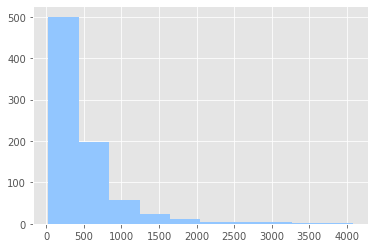

In [104]:

plt.hist(X['Molar Mass'])
plt.show() 


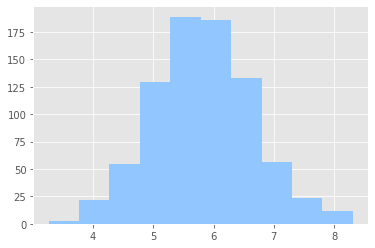

In [105]:
plt.hist(np.log1p(X['Molar Mass']))
plt.show() 

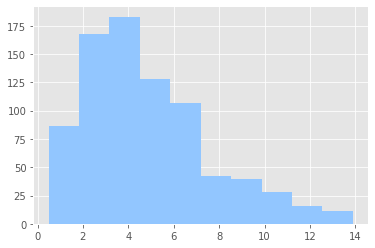

In [106]:
plt.hist(X['Calculated Density'])
plt.show() 


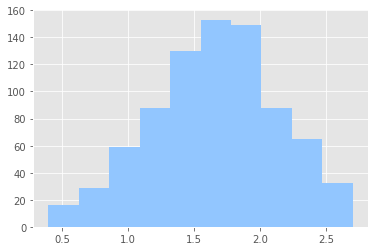

In [107]:
plt.hist(np.log1p(X['Calculated Density']))
plt.show() 


In [108]:
X['Calculated Density']=np.log1p(X['Calculated Density'])
X['Molar Mass']=np.log1p(X['Molar Mass'])

In [109]:
X

,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Dispersion,Hydrogen,Lithium,Beryllium,Boron,...,Tungsten,Lead,Bismuth,Thorium,Uranium,Hydroxyl,Ammonium,Hydrated Water,Molar Mass,Calculated Density
0,2,0.0,0,0.000,0,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,5.833698,2.241454
1,0,6.0,2,3.607,2,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,4.576271,2.093714
2,0,1.5,2,1.645,2,0.000,6,0,0,0,...,0,0,0,0,0,0,0,0,5.171042,0.692147
3,5,3.5,1,6.950,3,0.202,0,0,0,0,...,0,2,0,0,0,0,0,0,6.309541,2.415824
4,6,7.0,2,3.756,2,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,5.049022,2.522042
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6,0.0,0,0.000,0,0.000,0,0,0,0,...,0,0,0,0,0,0,0,0,5.204615,1.698181
146,3,0.0,0,0.000,0,0.000,0,0,0,3,...,0,0,0,0,0,0,0,0,5.127100,1.121026
147,2,2.0,2,3.330,4,0.000,4,0,0,0,...,0,0,0,0,0,0,0,0,5.672396,1.219058
148,3,2.5,3,5.517,4,0.000,2,0,0,0,...,1,0,0,0,0,0,0,0,5.458964,1.496269


In [110]:
X.dtypes

Crystal Structure       int64
Mohs Hardness         float64
Diaphaneity             int64
Specific Gravity      float64
Optical                 int64
                       ...   
Hydroxyl                int64
Ammonium                int64
Hydrated Water          int64
Molar Mass            float64
Calculated Density    float64
Length: 63, dtype: object

### **encoding and scaling data**

In [111]:
data1=pd.get_dummies(X,columns=['Crystal Structure','Diaphaneity','Optical'])


In [112]:

from sklearn.preprocessing import MinMaxScaler   
scaler = MinMaxScaler()


In [113]:
scaled = scaler.fit_transform(data1)
scaled=pd.DataFrame(scaled,columns=data1.columns)

In [114]:
scaled

,Mohs Hardness,Specific Gravity,Dispersion,Hydrogen,Lithium,Beryllium,Boron,Carbon,Nitrogen,Fluorine,...,Crystal Structure_6,Diaphaneity_0,Diaphaneity_1,Diaphaneity_2,Diaphaneity_3,Optical_0,Optical_1,Optical_2,Optical_3,Optical_4
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.631579,0.376003,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.157895,0.171479,0.000000,0.181818,0.0,0.0,0.000000,0.0,0.166667,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.368421,0.724487,0.948357,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.736842,0.391535,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
805,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.272727,0.0,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
806,0.210526,0.347128,0.000000,0.121212,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
807,0.263158,0.575107,0.000000,0.060606,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [115]:
df1.shape

(659, 139)

In [116]:
df2.shape

(150, 138)

In [117]:
train1=scaled[:659]
test1=scaled[659:]

In [118]:
train1

,Mohs Hardness,Specific Gravity,Dispersion,Hydrogen,Lithium,Beryllium,Boron,Carbon,Nitrogen,Fluorine,...,Crystal Structure_6,Diaphaneity_0,Diaphaneity_1,Diaphaneity_2,Diaphaneity_3,Optical_0,Optical_1,Optical_2,Optical_3,Optical_4
0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.631579,0.376003,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.157895,0.171479,0.000000,0.181818,0.0,0.0,0.000000,0.0,0.166667,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.368421,0.724487,0.948357,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.736842,0.391535,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
654,0.657895,0.338267,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
655,0.000000,0.297092,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
656,0.263158,0.390910,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
657,0.315789,0.307516,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [119]:
test1

,Mohs Hardness,Specific Gravity,Dispersion,Hydrogen,Lithium,Beryllium,Boron,Carbon,Nitrogen,Fluorine,...,Crystal Structure_6,Diaphaneity_0,Diaphaneity_1,Diaphaneity_2,Diaphaneity_3,Optical_0,Optical_1,Optical_2,Optical_3,Optical_4
659,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
660,0.236842,0.184510,0.0,0.666667,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
661,0.289474,0.304389,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
662,0.578947,0.000000,0.0,0.060606,0.0,0.0,0.000000,0.052632,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
663,0.526316,0.261649,0.0,0.000000,0.0,0.0,0.090909,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
804,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
805,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.272727,0.000000,0.0,0.000000,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
806,0.210526,0.347128,0.0,0.121212,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
807,0.263158,0.575107,0.0,0.060606,0.0,0.0,0.000000,0.000000,0.0,0.000000,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


In [120]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [121]:
Y1=df1['Refractive Index']

In [122]:
from scipy import stats

In [123]:
 posdata = Y1[Y1 > 0]

In [124]:
posdata

1      1.740
2      1.458
3      2.383
4      1.872
8      1.803
       ...  
653    1.809
654    1.588
655    1.629
656    1.625
657    1.587
Name: Refractive Index, Length: 480, dtype: float64

<AxesSubplot:xlabel='Refractive Index'>

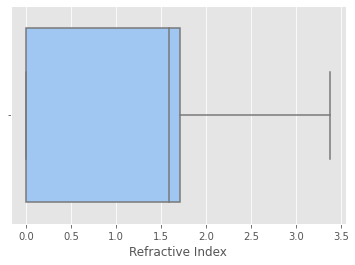

In [125]:
sns.boxplot(df1['Refractive Index'])


### **Transforming Target variable**

In [126]:
Y1[Y1>0], lam = stats.boxcox(posdata)

In [127]:
lam

-1.7679645341555315

In [128]:
Y1

0      0.000000
1      0.353178
2      0.275214
3      0.443784
4      0.378942
         ...   
654    0.315916
655    0.326919
656    0.325880
657    0.315637
658    0.000000
Name: Refractive Index, Length: 659, dtype: float64

In [129]:
##Y1[Y1>0]=np.power(Y1[Y1>0],-1.7679645341555315)

In [130]:
##Y1

In [131]:
Y1.max()

0.5000470562366809

In [132]:
target=pd.DataFrame(Y1)
     

<AxesSubplot:xlabel='Refractive Index'>

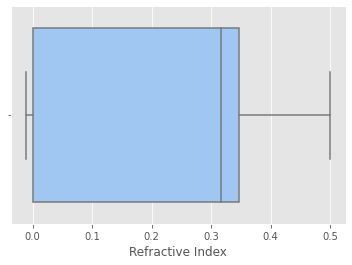

In [133]:
feature='Refractive Index'
sns.boxplot(target[feature])
     

In [134]:
(Y1 < 0).sum().sum()


1

In [135]:
from sklearn.metrics import r2_score


In [136]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(train1,Y1,test_size=0.2)

### **RandomForestRegressor**

In [137]:
rf = RandomForestRegressor(n_estimators = 50, random_state = 42 , max_depth= 5, min_samples_leaf=5)
rf.fit(x_train1, y_train1)

RandomForestRegressor(max_depth=5, min_samples_leaf=5, n_estimators=50,
                      random_state=42)

In [138]:
import math

In [139]:
y_pred=rf.predict(x_test1)

In [140]:
MSE=mean_squared_error(y_test1, y_pred)

In [141]:
r2_score(y_test1, y_pred)

0.7513136574573587

In [142]:
rmse = math.sqrt(MSE)  

In [143]:
rmse

0.07849380815447157

### **XGBRegressor**

In [144]:
xgb = XGBRegressor()
xgb.fit(x_train1, y_train1)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [145]:
y_pred1=xgb.predict(x_test1)

In [146]:
MSE=mean_squared_error(y_test1, y_pred1)

In [147]:
rmse = math.sqrt(MSE)  

In [148]:
rmse

0.09967048333665818

In [149]:
r2_score(y_test1, y_pred1)

0.5990277987820372

### **LGBMRegressor**

In [150]:

import lightgbm as lgb
from lightgbm import LGBMRegressor

In [151]:
model1 = LGBMRegressor()
model1.fit(x_train1, y_train1)


LGBMRegressor()

In [152]:
y_pred2= model1.predict(x_test1)


In [153]:
MSE=mean_squared_error(y_test1, y_pred2)

In [154]:
rmse = math.sqrt(MSE)  

In [155]:
rmse

0.08076364396781312

In [156]:
r2_score(y_test1, y_pred2)

0.7367229838145699

### **Parameter tuning LGBMRegressor**

In [157]:
pip install verstack

Note: you may need to restart the kernel to use updated packages.


In [158]:
from verstack import LGBMTuner

In [159]:
tuner = LGBMTuner(metric = 'rmse',trials=500)


 * Initiating LGBMTuner.fit
     . Settings:
     .. Trying 500 trials
     .. Evaluation metric: rmse 
     .. Study direction: minimize rmse

     . Trial number: 0 finished
     .. Optimization score (lower-better): rmse: 0.09341111213843667
 ...........................................................................
     . Trial number: 1 finished
     .. Optimization score (lower-better): rmse: 0.09508537950915125
 ...........................................................................
     . Trial number: 2 finished
     .. Optimization score (lower-better): rmse: 0.09139523241372766
 ...........................................................................
     . Trial number: 3 finished
     .. Optimization score (lower-better): rmse: 0.07845816663510632
 ...........................................................................
     . Trial number: 4 finished
     .. Optimization score (lower-better): rmse: 0.09781567541443986
 .........................................

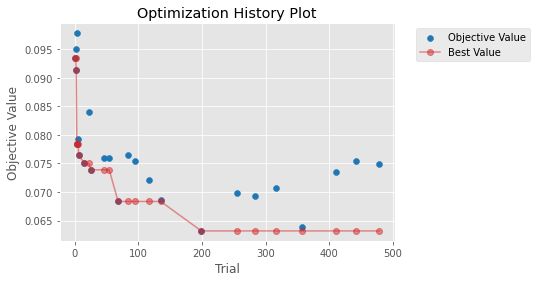

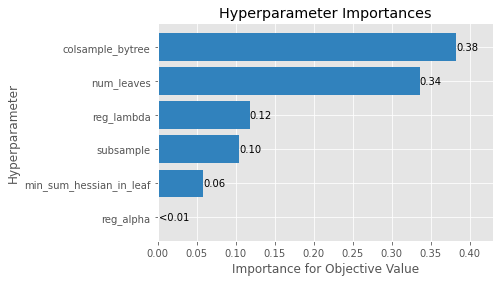

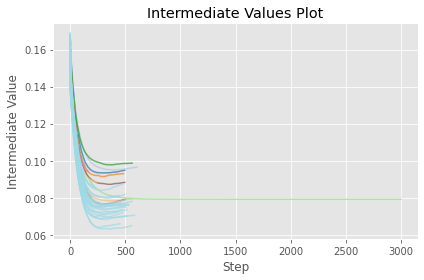

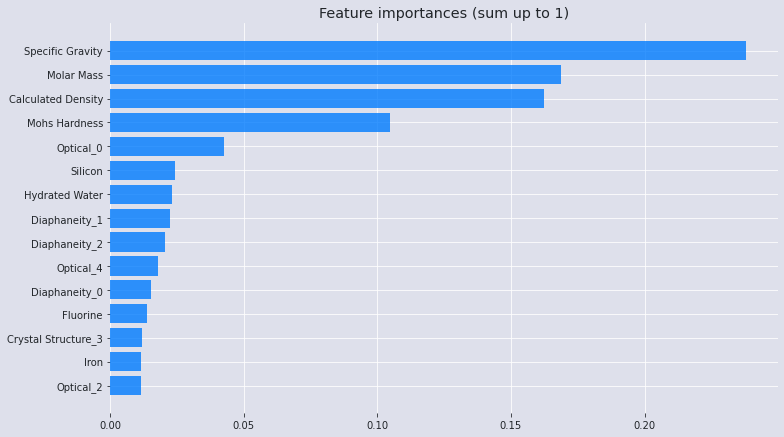


     . Optuna hyperparameters optimization finished
     .. Best trial number:199    |     rmse:          0.06318017789996594
 ---------------------------------------------------------------------------
     . n_estimators optimization finished
     .. best iteration:  406   |     rmse:          0.09125235053151216

Time elapsed for fit execution: 40.15839 seconds


In [160]:
tuner.fit(x_train1, y_train1)


In [161]:
pred = tuner.predict(x_test1)


In [162]:
MSE=mean_squared_error(y_test1, pred)


In [163]:
rmse = math.sqrt(MSE)  

In [164]:
rmse

0.07678070123328645

In [165]:
r2_score(y_test1, pred)

0.7620502326868044

### **Feature Importance using MI**

In [166]:
from sklearn.feature_selection import mutual_info_regression
mutual_info = mutual_info_regression(x_train1, y_train1)
mutual_info

array([1.71193852e-01, 7.30207366e-01, 5.68616175e-03, 3.91133647e-02,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.35803863e-02,
       2.68087278e-02, 2.67304087e-02, 6.00264466e-03, 4.84570517e-02,
       8.13456526e-04, 7.07828176e-02, 0.00000000e+00, 4.04481651e-02,
       1.33818098e-03, 2.12931290e-02, 5.79972150e-02, 0.00000000e+00,
       8.26593657e-02, 0.00000000e+00, 4.63504786e-02, 0.00000000e+00,
       2.94904153e-02, 0.00000000e+00, 0.00000000e+00, 1.11223598e-02,
       0.00000000e+00, 0.00000000e+00, 4.51081942e-03, 2.24975159e-02,
       1.26934987e-02, 0.00000000e+00, 2.01721693e-03, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.41296663e-03,
       0.00000000e+00, 1.31681239e-02, 1.32534092e-02, 0.00000000e+00,
       0.00000000e+00, 1.59156103e-02, 5.38860289e-03, 0.00000000e+00,
       2.15736048e-02, 0.00000000e+00, 0.00000000e+00, 5.64638308e-02,
       0.00000000e+00, 3.72738338e-04, 1.78448423e-02, 1.53070422e-03,
      

In [167]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = x_train1.columns
mutual_info.sort_values(ascending=False)


Specific Gravity    0.730207
Optical_0           0.323516
Mohs Hardness       0.171194
Optical_4           0.170562
Diaphaneity_0       0.157820
                      ...   
Iodine              0.000000
Cesium              0.000000
Terbium             0.000000
Tantalum            0.000000
Silver              0.000000
Length: 76, dtype: float64

In [168]:
mutual_info.sort_values(ascending=False).head(30)

Specific Gravity       0.730207
Optical_0              0.323516
Mohs Hardness          0.171194
Optical_4              0.170562
Diaphaneity_0          0.157820
Calculated Density     0.085484
Titanium               0.082659
Silicon                0.070783
Calcium                0.057997
Diaphaneity_3          0.057136
Lead                   0.056464
Crystal Structure_0    0.052769
Diaphaneity_2          0.050045
Hydrated Water         0.049787
Optical_3              0.048645
Magnesium              0.048457
Chromium               0.046350
Sulfur                 0.040448
Optical_2              0.039140
Hydrogen               0.039113
Crystal Structure_1    0.030408
Iron                   0.029490
Nitrogen               0.026809
Fluorine               0.026730
Crystal Structure_5    0.024276
Selenium               0.022498
Hafnium                0.021574
Potassium              0.021293
Uranium                0.017845
Barium                 0.015916
dtype: float64

<AxesSubplot:>

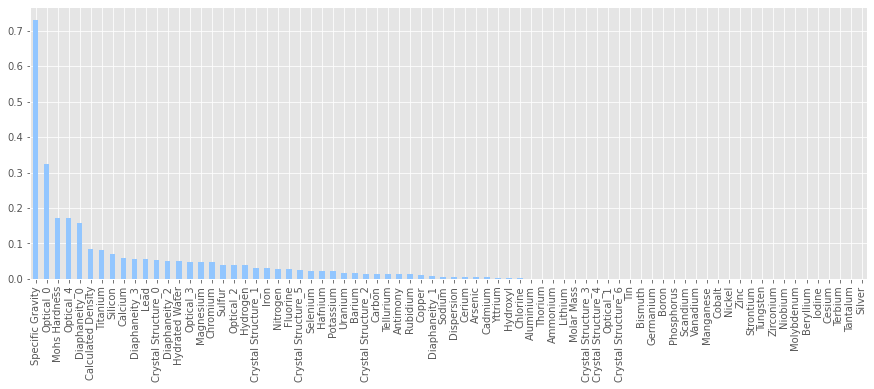

In [169]:

mutual_info.sort_values(ascending=False).plot.bar(figsize=(15,5))

In [170]:
from sklearn.model_selection import  GridSearchCV

In [171]:
X=pd.concat([train1,Y1],axis=1)

### **Hyperparameter tuning RandomForest Regressor**

In [ ]:

##param_grid = {
    "n_estimators":[100,200,300,500,1000],
    "max_depth":[10, 50, 100],
    "max_features":[6,8,10,12,14,16],
                   
    'min_samples_split': [2,4,6,8,10],
    'min_samples_leaf': [2,4,6,8,10]
}

rf_reg = RandomForestRegressor()

rf_reg_tuned = GridSearchCV(estimator=rf_reg,
                            param_grid=param_grid,
                            cv=3,
                            n_jobs=-1,
                            verbose=2)

rf_reg_tuned.fit(x_train1, y_train1)
rf_reg_tuned.best_estimator_



In [ ]:
rf_reg_tuned.best_estimator_


In [173]:
rf = RandomForestRegressor(max_depth=10, max_features=14, min_samples_leaf=2,
                      min_samples_split=10, n_estimators=200)

rf.fit(x_train1, y_train1)

RandomForestRegressor(max_depth=10, max_features=14, min_samples_leaf=2,
                      min_samples_split=10, n_estimators=200)

In [174]:
pred4=rf.predict(x_test1)

In [175]:
MSE=mean_squared_error(y_test1, pred4)


In [176]:
rmse = math.sqrt(MSE)  

In [177]:
rmse

0.07607422626082827

In [178]:
r2_score(y_test1, pred4)

0.7664089365220869

### **Bayessian Ridge Regression**

In [179]:
from sklearn.linear_model import BayesianRidge


In [180]:
model = BayesianRidge()
model.fit(x_train1, y_train1)
   

BayesianRidge()

In [181]:
pred5=model.predict(x_test1)

In [182]:
MSE=mean_squared_error(y_test1, pred5)
rmse = math.sqrt(MSE)  

In [183]:
rmse

0.07422825725971784

In [184]:
r2_score(y_test1, pred5)

0.777607741883327

In [185]:
modelultra=BayesianRidge(alpha_1=0.15, alpha_2=0.3, alpha_init=None, compute_score=True,
              copy_X=True, lambda_1=0.3, lambda_2=0.0005,
              n_iter=300, normalize=True, tol=0.001)

In [186]:
modelultra.fit(x_train1, y_train1)


BayesianRidge(alpha_1=0.15, alpha_2=0.3, compute_score=True, lambda_1=0.3,
              lambda_2=0.0005, normalize=True)

In [187]:
pred6=modelultra.predict(x_test1)

In [188]:
MSE=mean_squared_error(y_test1, pred6)
rmse = math.sqrt(MSE)  

In [189]:
rmse

0.07657392398838271

In [190]:
r2_score(y_test1, pred6)

0.7633301465985013

In [227]:
predttt=0.5*pred+0.5*pred5

In [228]:
MSE=mean_squared_error(y_test1, predttt)
rmse = math.sqrt(MSE)  

In [229]:
rmse

0.07409495648516957

In [223]:
r2_score(y_test1, predttt)

0.7784057787151426

### **Ensembling**

In [198]:
predfin1=tuner.predict(test1)

In [200]:
predfin2=model.predict(test1)

In [201]:
predfinal=0.5*predfin1+0.5*predfin2

In [205]:
predfinal=pd.DataFrame(predfinal,columns=target.columns)

In [206]:
predfinal

,Refractive Index
0,0.038749
1,0.231773
2,0.325967
3,0.306705
4,0.304178
...,...
145,0.047600
146,0.000954
147,0.330103
148,0.364501


### **Inverse Transforning Target Variable for submission**

In [208]:
from scipy.special import boxcox, inv_boxcox

In [209]:
predfinal['Refractive Index']=inv_boxcox(predfinal['Refractive Index'], -1.7679645341555315)

In [210]:
fin=pd.concat([df2,predfinal],axis=1)

In [212]:
fin=fin.round(3)


In [213]:
fin.head(30)

,Name,Crystal Structure,Mohs Hardness,Diaphaneity,Specific Gravity,Optical,Dispersion,Hydrogen,Helium,Lithium,...,Phosphate,Sulphate,Carbonate,Ammonium,Hydrated Water,count,Molar Mass,Molar Volume,Calculated Density,Refractive Index
0,Bridgmanite,0,0.00,0,0.000,0,0.0,0,0,0,...,0,0,0,0,0,9,314.089,0.022,11.592,1.041
1,Ettringite,5,2.25,1,1.770,3,0.0,22,0,0,...,0,0,0,0,0,48,556.480,0.459,1.005,1.347
2,Krohnkite,2,2.75,3,2.920,4,0.0,0,0,0,...,0,0,0,0,1,8,200.614,0.045,3.713,1.625
3,Kainosite-(Y),3,5.50,2,0.000,4,0.0,2,0,0,...,0,0,0,0,0,17,359.176,0.134,2.217,1.556
4,Poudretteite,5,5.00,3,2.510,3,0.0,0,0,0,...,0,0,0,0,0,7,148.983,0.034,3.672,1.547
5,Vauquelinite,2,2.75,2,6.160,4,0.0,0,0,0,...,0,0,0,0,0,15,769.465,0.090,7.123,1.897
6,Putnisite,3,1.75,2,2.200,4,0.0,17,0,0,...,0,0,0,0,8,70,1146.160,0.493,1.929,1.427
7,Sarabauite,2,4.00,2,4.800,4,0.0,0,0,0,...,0,0,0,0,0,14,825.073,0.056,12.197,1.848
8,Ferrihydrite,5,0.00,1,0.000,0,0.0,0,0,0,...,0,0,0,0,0,7,232.547,0.034,5.740,1.002
9,Amblygonite,1,5.75,0,3.045,4,0.0,0,0,1,...,0,0,0,0,0,9,172.883,0.045,3.199,1.607


In [214]:
sub=fin[['Name','Refractive Index']]

In [215]:
sub.to_csv('submifssion.csv')